# Examples and overview
You now have all the basic tools to solve interesting economic models. The trick is to be able to combine what you know to solve problems in practice.

In [1]:
# magic to reload modules automatically
%load_ext autoreload
%autoreload 2

# standard imports
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

## Optimize, optimize, optimize
**The two most important tools:** 

1. Solving optimization problems with `scipy.optimize.minimize` and `scipy.optimize.minimize_scalar`
2. Solving equations with `scipy.optimize.root` and `scipy.optimize.root_scalar`

**Problem:** A bit of a black box...

* **Lecture 10:** Details on solving equations.
* **Lecture 11:** Details on numerical optimization.
* **Now:** Compare with a) a *loop search* and b) a *hand-written optimizer*.m

### Loops vs. optimizer
**Consider a simple maximization problem:** 

$$
\max_x f(x) = \max_x -3(x-2)^2+1
$$

**Solution:**

$$
f^\prime(x) = 0 \Leftrightarrow -6(x-2) = 0 \Leftrightarrow x = 2.0
$$

In [6]:
def f_func(x):
    return -3*(x-2)**2+1

In [7]:
N = 100

# a. allocate solutions
x_vec = np.linspace(-10,10,N)
f_vec = np.empty(N)

# b. initial guess
f_best = -np.inf # initial maximum
x_best = np.nan # not-a-number

# c. for loop to update
for i,x in enumerate(x_vec):
    # multiple/chained assignment
    f_now = f_vec[i] = f_func(x)
    
    if f_now > f_best:
        x_best = x
        f_best = f_now
        
print(f'best with loop is {f_best:.8f} at x = {x_best:.8f}')

best with loop is 0.98041016 at x = 1.91919192


Not the smartest solution, though we could increase precision and get closer to 2 by increasing N

<Figure size 432x288 with 0 Axes>

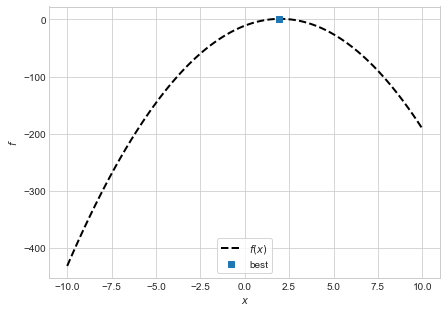

In [12]:
# Always start with the "canvas"
fig = plt.figure()
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(1,1,1)

ax.plot(x_vec,f_vec,ls='--',lw=2,color='black',label='$f(x)$')
ax.plot(x_best,f_best,ls='',marker='s',label='best')

ax.set_xlabel('$x$') 
ax.set_ylabel('$f$')
ax.legend(loc='lower center',frameon=True); 

## Minimize
### 1) Solution with `scipy.optimize.minimize_scalar` 

In [38]:
def f_func(x):
    return -3*(x-2)**2+1

In [51]:
obj = lambda x: -f_func(x) # input is a scalar

result = optimize.minimize_scalar(obj,bracket=(-10,10),method='brent') # imported optimize, uses default method 'brent', search in bracket -10;10

# return solutions
x = result.x 
f = -result.fun

print(f'best is {f:.8f} at x = {x:.8f}')

best is 1.00000000 at x = 2.00000000


### 2) Solution with `scipy.optimize.minimize`

In [ ]:
def f_func(x):
    return -3*(x-2)**2+1

In [ ]:
x_guess = [0]   # input is now a vector

obj = lambda x: -f_func(x[0]) # now the input is a vector and we only put in first element of the vector

res = optimize.minimize(obj,x_guess,method='Nelder-Mead')

# solutions
x = res.x[0]
f = -res.fun

print(f'best is {f:.8f} at x = {x:.8f}')

best is 1.00000000 at x = 2.00000000


## Root optimizer
### 3) Solution with `scipy.optimize.root_scalar`   
Find derivative and solve via FOC:

In [ ]:
#define a function of the derivate
def fp_func(x):
    return -6*(x-2)

In [ ]:
obj = lambda x: fp_func(x) # input is a scalar

result = optimize.root_scalar(obj,bracket=(-10,10),method='bisect') #Basic bisection routine to find a zero of the function f between the arguments a and b. f(a) and f(b) cannot have the same signs

# solutions
x = result.root
f = f_func(result.root)

print(f'best is {f:.8f} at x = {x:.8f}')

best is 1.00000000 at x = 2.00000000


### 4) Solution with `scipy.optimize.root`

In [ ]:
#define a function of the derivate
def fp_func(x):
    return -6*(x-2)

In [ ]:
x_guess = [0] # input is now a vector

obj = lambda x: fp_func(x)

result = optimize.root(obj,x_guess,method='hybr') #Basic bisection routine to find a zero of the function f between the arguments a and b. f(a) and f(b) cannot have the same signs

# solutions
x = result.x[0]
f = f_func(x)

print(f'best is {f:.8f} at x = {x:.8f}')

best is 1.00000000 at x = 2.00000000
